In [263]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

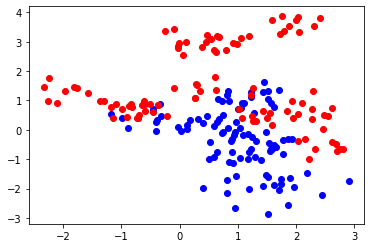

In [264]:
# 1(a)
a1 = np.array([1,0])
sd1 = np.array([[1,0],[0,1]])
m = np.random.multivariate_normal(a1, sd1, 10)

a2 = np.array([0,1])
sd2 = np.array([[1,0],[0,1]])
md = np.random.multivariate_normal(a2, sd2, 10)


# 1(b)
a=0
sd=np.array([[0.1,0],[0,0.1]])
a=m[0]
p1=np.random.multivariate_normal(a,sd,10)
for i in range(9):
    a = m[i+1]
    p1 = np.concatenate((p1,np.random.multivariate_normal(a, sd, 10)), axis=0)
    
# 1(c)
a = 0
sd = np.array([[0.1,0],[0,0.1]])
a = md[0]
n1= np.random.multivariate_normal(a,sd,10)
for i in range(9):
    a = md[i+1]
    n1 = np.concatenate((n1,np.random.multivariate_normal(a,sd, 10)), axis = 0)

# Plotting the formed dataset
plt.figure()
plt.plot(p1[0::, 0], p1[0::, 1], 'o', color = 'blue') #+1 dots are shown as blue dots
plt.plot(n1[0::, 0], n1[0::, 1],'o', color = 'red')   #-1 dots are shown as red dots
plt.show()

In [265]:
Yp1 = np.ones(p1.shape[0],)
Yp1
Yn1 = -1*np.ones(p1.shape[0])
Yn1
Y = np.concatenate((Yp1,Yn1),axis=0)
X1 = np.concatenate((p1,n1),axis=0)
m = X.shape[0]
X = np.hstack(((np.ones((m,))).reshape(m,1), X1))

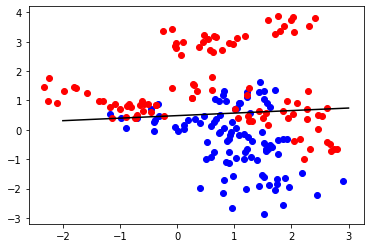

Training Set Error using Linear Model is  23.5 %


In [266]:
# Q2 : Classifying using Linear Model

def linearRegression(X_train, Y_train):
    theta = np.linalg.inv(X_train.T@X_train)@X_train.T@Y_train
    return theta

theta = linearRegression(X, Y)
plt.figure()
plt.plot(p1[0::, 0], p1[0::, 1], 'o', color = 'blue') #+1 dots are shown as blue dots
plt.plot(n1[0::, 0], n1[0::, 1],'o', color = 'red')   #-1 dots are shown as red dots
temp_x1 = np.array([-2,-1,0,1,2,3])
temp_x2 = (-1*theta[1]/theta[2])*temp_x1 - theta[0]/theta[2]
plt.plot(temp_x1, temp_x2, color='black')
plt.show()

Y_pred = X@theta
Y_p = np.array([])
for i in Y_pred:
    if (i>0):
        Y_p = np.concatenate((Y_p,np.array([1])))
    else:
        Y_p = np.concatenate((Y_p,np.array([-1])))
Miss =np.sum(np.abs(Y_p-Y)/2)
Total = Y.shape[0]
error = Miss/Total*100;
print("Training Set Error using Linear Model is ", error,"%")